In [1]:
import numpy as np
import matplotlib.pyplot as plt

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def plotBaseline(filename):
    data = np.genfromtxt(filename, skip_header = 3, delimiter="\t", usecols = [0,1,2], dtype=str)
    labels = [" ".join(col) for col in data[:2, :].T]
    data = data[2:].astype(float)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    t = data[:, 0]
    ax1.plot(t, data[:, 1], c = COLORS[0])
    ax2.plot(t, data[:, 2], c = COLORS[1])

    ax1.set_xlabel("Tiempo (s)")

    ax1.set_ylabel('Potencia ($\mu$W)', color = COLORS[0])
    ax1.tick_params('y', colors = COLORS[0])

    ax2.set_ylabel('Energía (mJ)', color = COLORS[1])
    ax2.tick_params('y', colors = COLORS[1])

    return fig, ax1, ax2

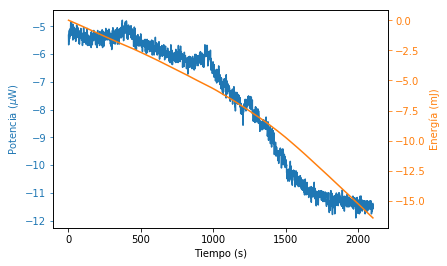

In [3]:
fig, ax1, ax2 = plotBaseline("JBBASE1.ASC")
plt.show()

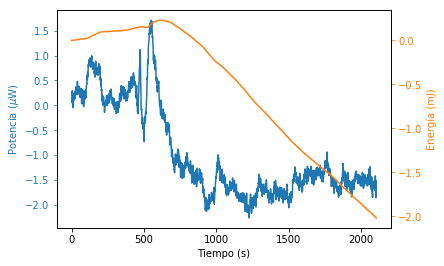

In [4]:
fig, ax1, ax2 = plotBaseline("Adjust 1/JBBASE2.ASC")
plt.show()

In [5]:
data = np.genfromtxt('motorBaseline3.txt', skip_header = 2)

In [6]:
from_ = 22500
to_ = 45000

t_b, q_b, p = data[from_ : to_].T
t_b = t_b / 3600
t_b = t_b - t_b[0]

mean, std = q_b.mean(), q_b.std()
print(mean, std)

-15.710653377777778 0.37238749577367736


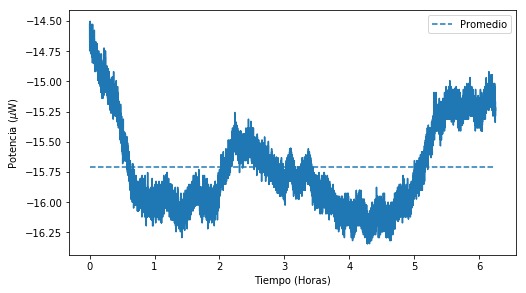

In [7]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax.plot(t_b, q_b)
ax.plot([t_b[0], t_b[-1]], [mean, mean], '--', c = COLORS[0], label = 'Promedio')

ax.set_xlabel('Tiempo (Horas)')
ax.set_ylabel('Potencia ($\mu$W)')

ax.legend()

plt.show()

fig.savefig('baseline.png', dpi = 300)

In [8]:
import pandas as pd

df = pd.read_csv('motor.csv')

In [9]:
txt = df.to_latex(index = False, decimal = ',')
print(txt)

\begin{tabular}{rlrrrr}
\toprule
 Antes (uW) &   Después (uW) &  Delta (uW) &  Antes (uW).1 &  Después (uW).1 &  Delta (uW).1 \\
\midrule
      -7,58 &           -5.5 &        2,08 &         -5,84 &           -7,78 &         -1,94 \\
      -6,12 &          -3.78 &        2,34 &         -5,12 &           -7,04 &         -1,92 \\
      -5,04 &          -2.76 &        2,28 &         -4,17 &           -6,48 &         -2,31 \\
      -5,43 &          -3.21 &        2,22 &         -5,22 &           -7,31 &         -2,09 \\
      -6,65 &          -4.72 &        1,93 &         -6,71 &           -8,54 &         -1,83 \\
      -7,75 &          -5.84 &        1,91 &         -8,35 &           -9,93 &         -1,58 \\
        NaN &  promedio (uW) &        2,10 &           NaN &             NaN &         -1,90 \\
        NaN &       std (uW) &        0,20 &           NaN &             NaN &          0,20 \\
\bottomrule
\end{tabular}



In [10]:
from_ = 84000
to_ = 92500

t_m, q_m, p = data[from_ : to_].T
t_m = t_m / 3600
t_m = t_m - t_m[0]

a, b, c = np.polyfit(t_m, q_m, 2)
reg = a * t_m**2 + b * t_m + c

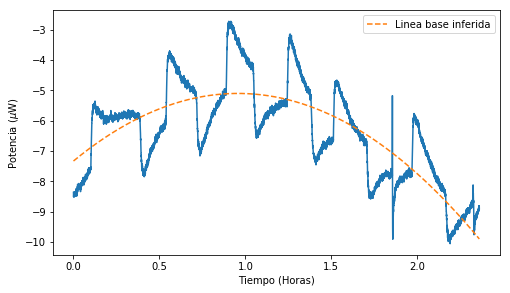

In [11]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax.plot(t_m, q_m)
ax.plot(t_m, reg, '--', label = 'Linea base inferida')

ax.set_xlabel('Tiempo (Horas)')
ax.set_ylabel('Potencia ($\mu$W)')

ax.legend()

fig.savefig("motor.png", dpi = 300)